# Game market research

Game online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. It is necessary to identify patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.
I have data up to 2016. It is now December 2016 and we are planning a campaign for 2017. It is necessary to work out the principle of working with data.

Data Description games.csv

- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - Sales in North America (millions of dollars)
- EU_sales - sales in Europe (millions of dollars)
- JP_sales - sales in Japan (millions of dollars)
- Other_sales - sales in other countries (millions of dollars)
- Critic_Score - Critics score (from 0 to 100)
- User_Score - user score (from 0 to 10)
- Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016 may not be complete.

# Шаг 1. Open data file and study general information
Import the necessary libraries and read the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('omited')

Exploring general information about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We see 16713 values, while not all data is available, there are many gaps

Let's see the first 10 values

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


The main omissions are concentrated in the estimates. Given the size of the database, this can be caused by 
1) Game size (no one rates smaller games) 
2) Age of limitation (older games weren't rated in the data source) 
3) Failed to load from data or other issues

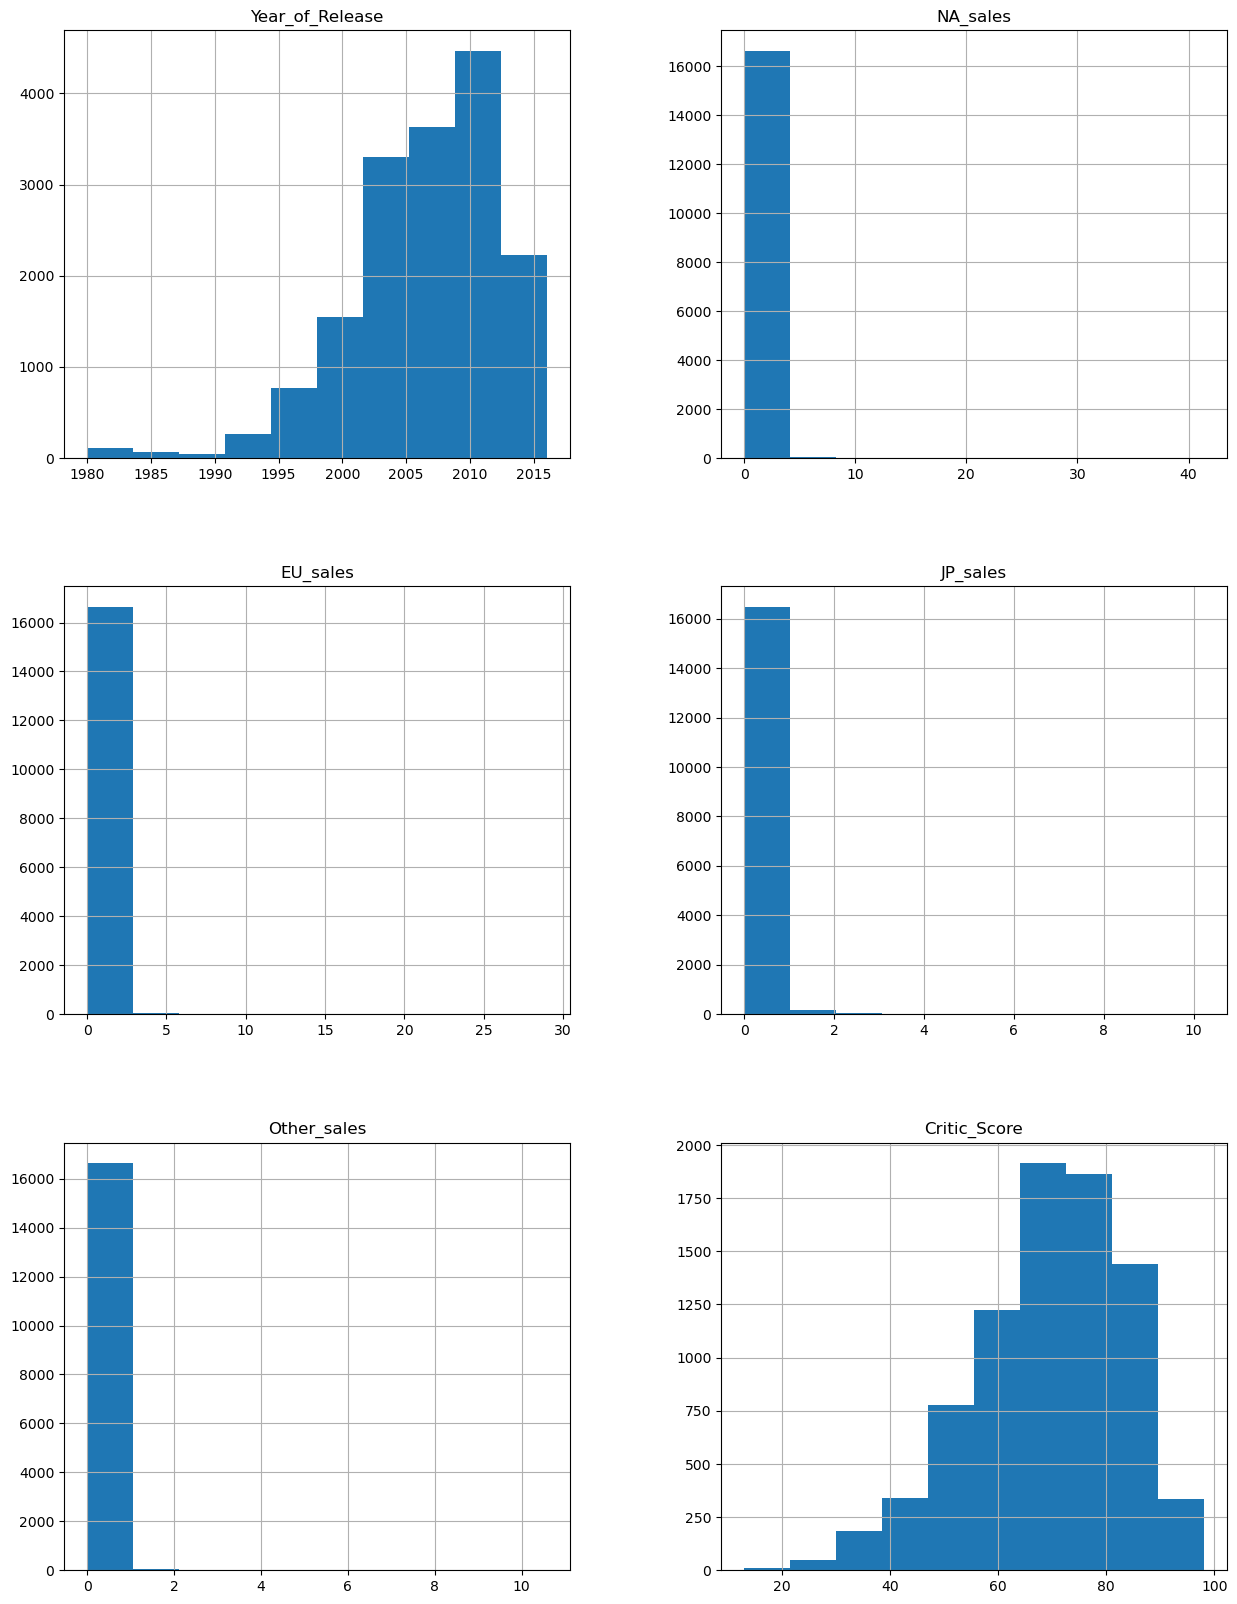

In [5]:
df.hist(figsize=(15, 20));

We see outliers in the data in all columns except for the year and the rating of critics

# Prepare the data
Change the column names (reduce to lower case);
Apply the lower case function to the names and check the result

In [6]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


147
0.8794495961711039
0


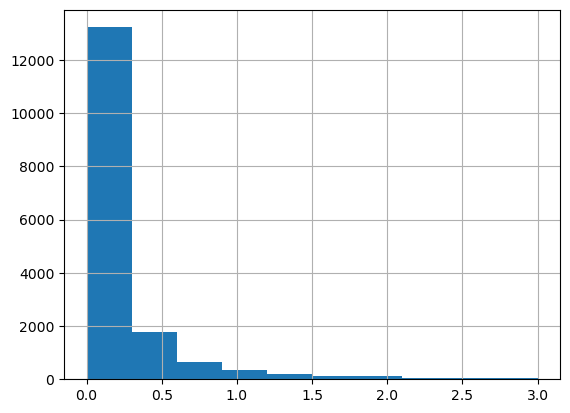

In [7]:
# Calculate the proportion of outstanding values and remove them if it is small
print(df[df['na_sales']>3]['na_sales'].count())
print(100*df[df['na_sales']>3]['na_sales'].count()/df['na_sales'].count())
df['na_sales'].hist(bins=10,range=(0,3))
df = df.drop(index = df[(df['na_sales'] >3)].index)
#validation
print(df[df['na_sales']>3]['na_sales'].count())

19
0.11467889908256881
0


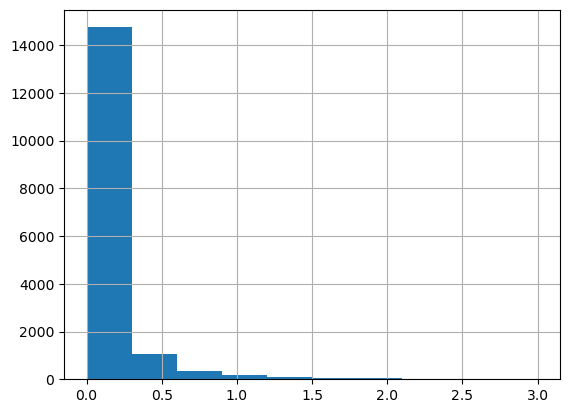

In [8]:
# Calculate the proportion of outstanding values and remove them if it is small
print(df[df['eu_sales']>3]['eu_sales'].count())
print(100*df[df['eu_sales']>3]['eu_sales'].count()/df['eu_sales'].count())
(df['eu_sales'].hist(bins=10,range=(0,3)))
df = df.drop(index = df[(df['eu_sales'] >3)].index)
#validation
print(df[df['eu_sales']>3]['eu_sales'].count())


0
0.0
0


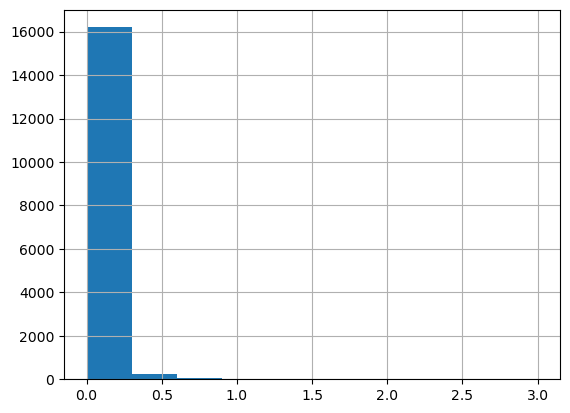

In [9]:
# Calculate the proportion of outstanding values and remove them if it is small
print(df[df['other_sales']>3]['other_sales'].count())
print(100*df[df['other_sales']>3]['other_sales'].count()/df['other_sales'].count())
df['other_sales'].hist(bins=10,range=(0,3))
df = df.drop(index = df[(df['other_sales'] >3)].index)
#validation
print(df[df['other_sales']>3]['other_sales'].count())


14
0.08459725663182065
0


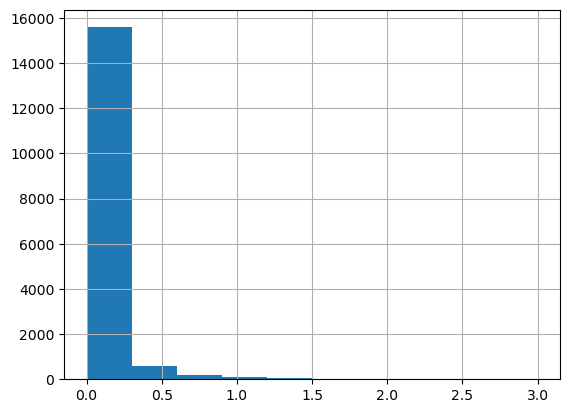

In [10]:
#Calculate the proportion of outstanding values and remove them if it is small
print(df[df['jp_sales']>3]['jp_sales'].count())
print(100*df[df['jp_sales']>3]['jp_sales'].count()/df['jp_sales'].count())
df['jp_sales'].hist(bins=10,range=(0,3))
df = df.drop(index = df[(df['jp_sales'] >3)].index)
#validation
print(df[df['jp_sales']>3]['jp_sales'].count())

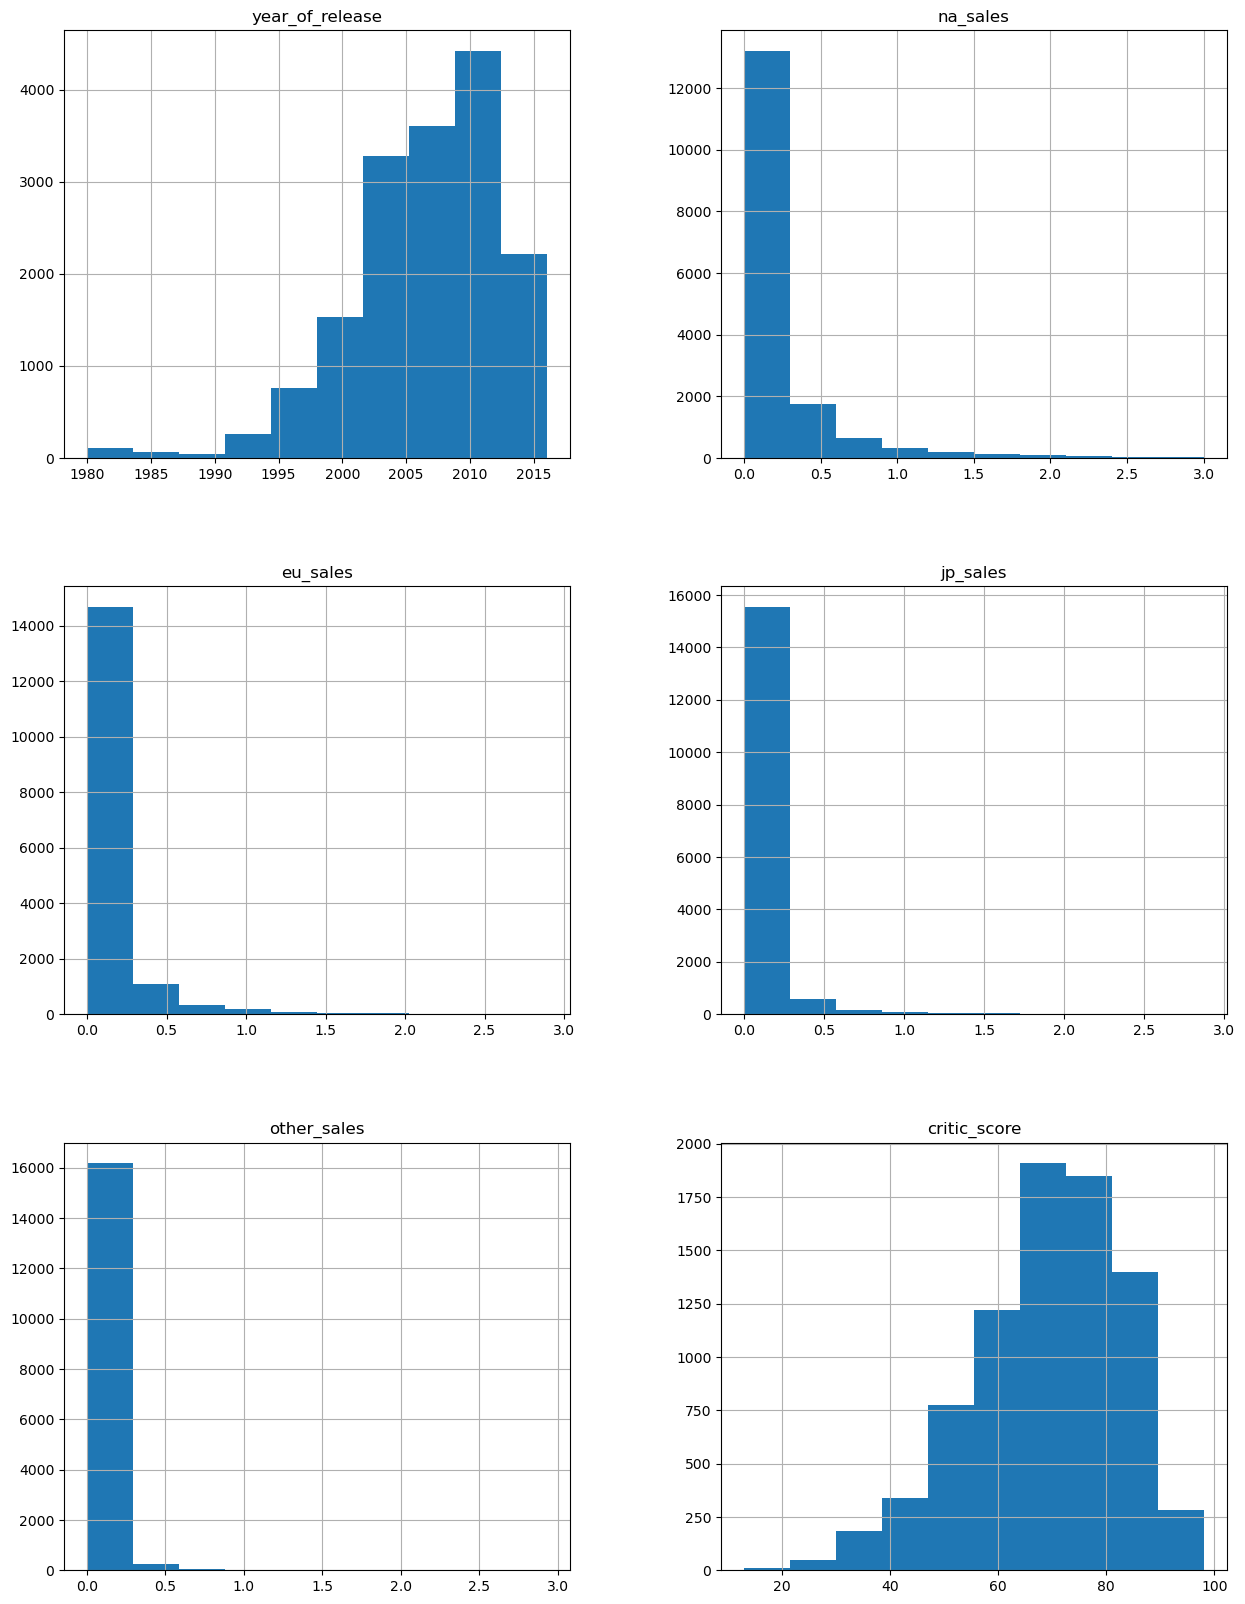

In [11]:
df.hist(figsize=(15, 20));

Let's see how many passes

In [12]:
df.isna().sum()

name                  2
platform              0
year_of_release     268
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8515
user_score         6640
rating             6705
dtype: int64

The main gaps are in the estimates. There's still a bit in years and game titles

Delete empty lines in games and check

In [13]:
df.dropna(subset=['name'], inplace=True)
df['name'].isna().sum()

0

Convert the data to the required types. Let's describe in which columns the data type was replaced and why
Finding out the current data types

In [14]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Let's translate the numerical data (estimates in numbers, years) into a numerical format. Leave the rest as they are text.
Data containing 'tbd' can be cast to NaN, so 'tbd - to be determined. Value not yet defined

In [15]:
df['user_score'] = df['user_score'].replace('tbd', '', regex=True)

Check that with gaps in the year field

In [16]:
df[df['year_of_release'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
df.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


We see that it is possible to fill in the gaps through other platforms. Let's try and see the result

In [18]:
print(df['year_of_release'].isna().sum())
for i in df[df['year_of_release'].isnull() == True].index:  
    df.loc[i,'year_of_release'] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()
print(df['year_of_release'].isna().sum())

268
146


Replacing the values of numerical variables

In [19]:
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')

In [20]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'].fillna('')
df['critic_score'].fillna('')
df['critic_score'].astype('float')
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')

In [21]:
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Calculate the total sales in all regions and write them in a separate column.

In [22]:
df['total_sales'] = (df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'])
print('Total sales in all regions:',df['total_sales'].sum())

Total sales in all regions: 7016.18


# Step 3:  Exploratory data analysis
See how many games were released over the years. Is data for all periods important?

We group the data by years and build a graph.
Data before 2000 looks unrepresentative, as it differs greatly from the more recent period

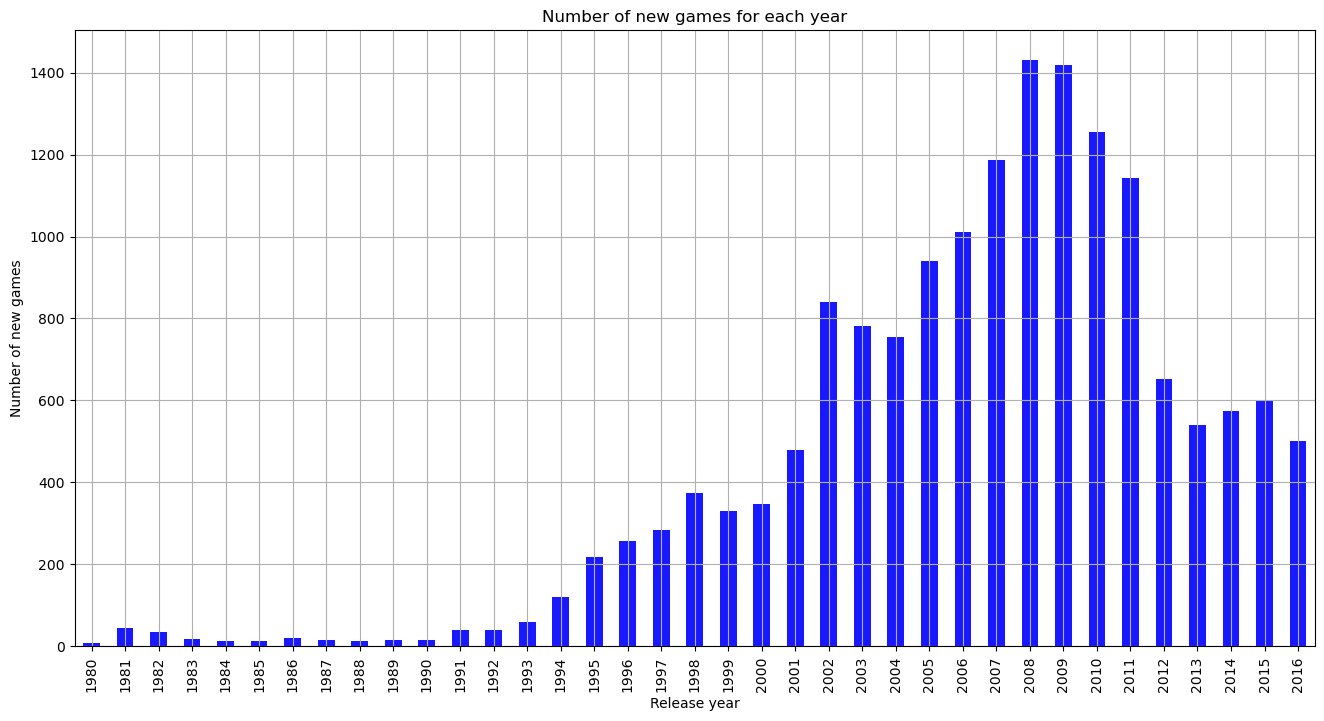

In [23]:
(
df
.pivot_table(index='year_of_release', values='name', aggfunc='count')
.plot(y='name', kind='bar', figsize=(16, 8), title='Number of new games for each year', grid=True, color='blue', alpha=0.9, legend=False)
.set(xlabel='Release year', ylabel='Number of new games')
)
plt.show()

We have seen rapid growth since 1995. The drop may be caused by incomplete data on the games market, as mobile platforms (Iphone and analogues) are not taken into account. The first iPhone appeared in 2012, while the market already existed based on nokia, sony, samsung

See how sales have changed across platforms. Select the platforms with the highest total sales and plot the distribution by year.

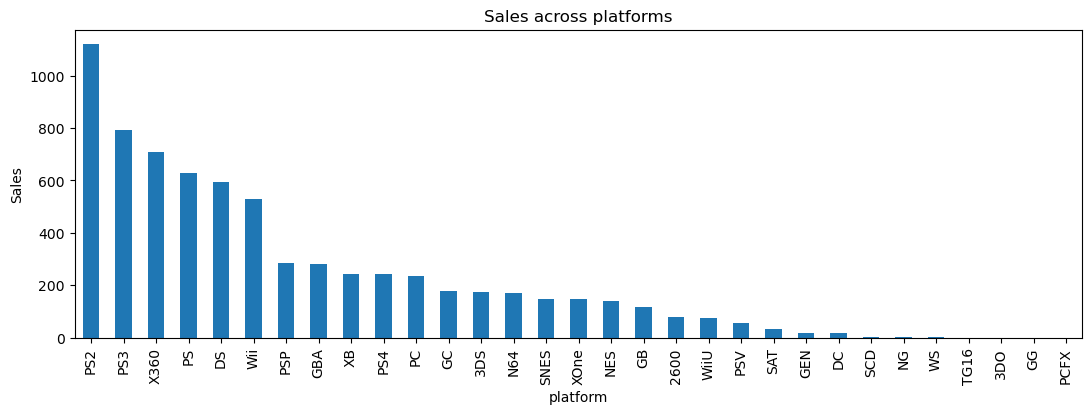

In [24]:
(
df.groupby('platform')['total_sales']
    .sum().sort_values(ascending=False)
    .plot(kind='bar', figsize=(13,4), title='Sales across platforms')
)
plt.ylabel("Sales")
plt.show()

We build charts for the top platforms

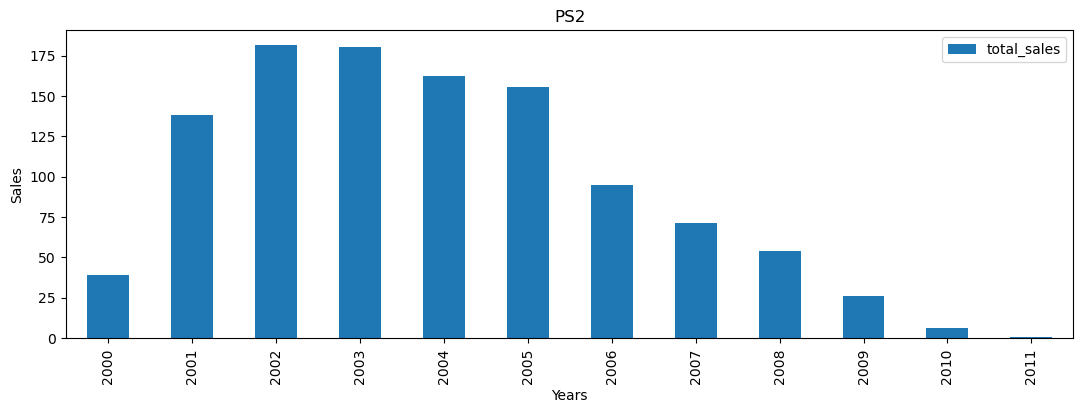

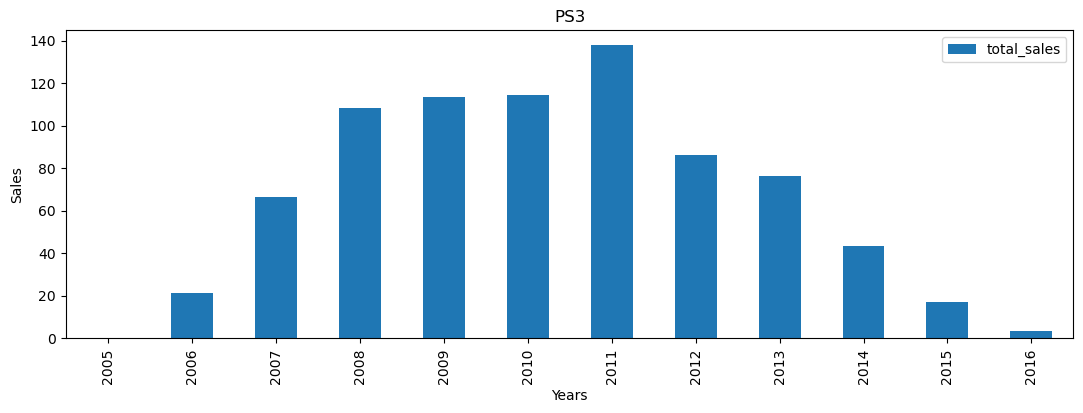

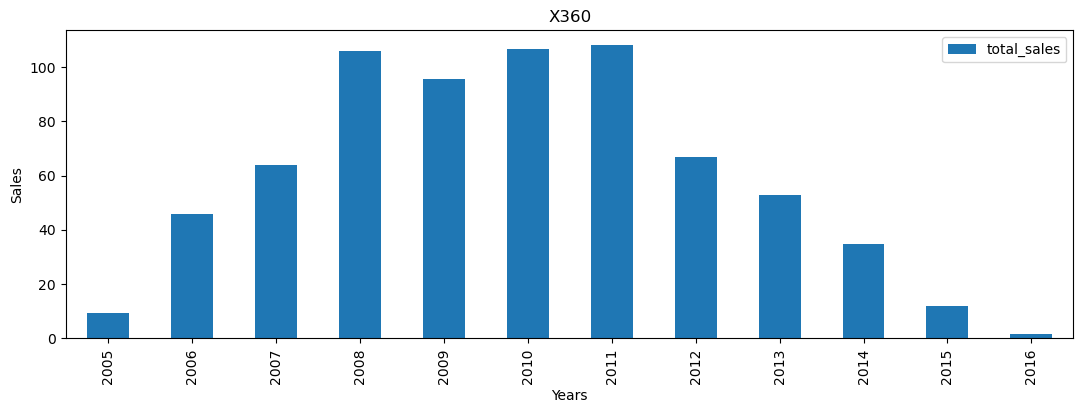

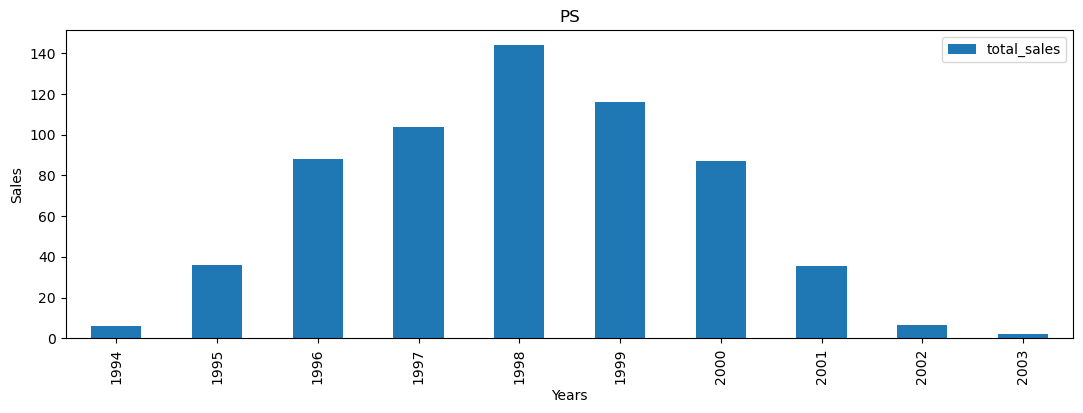

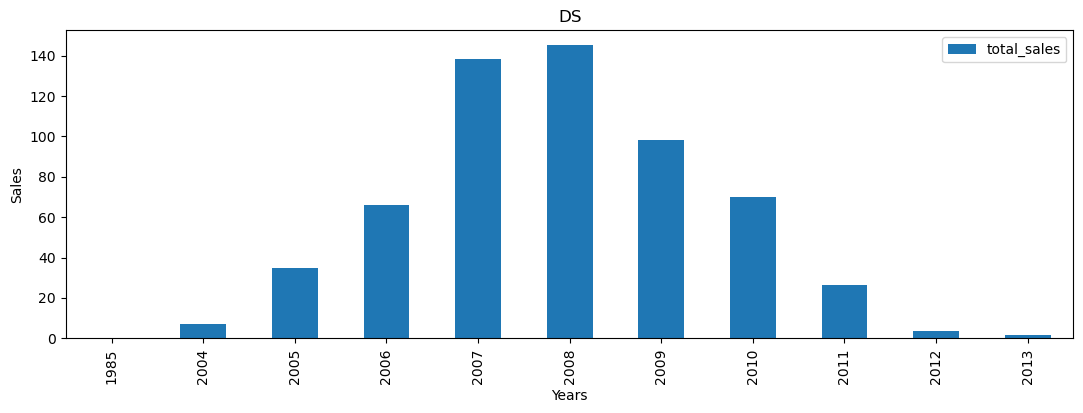

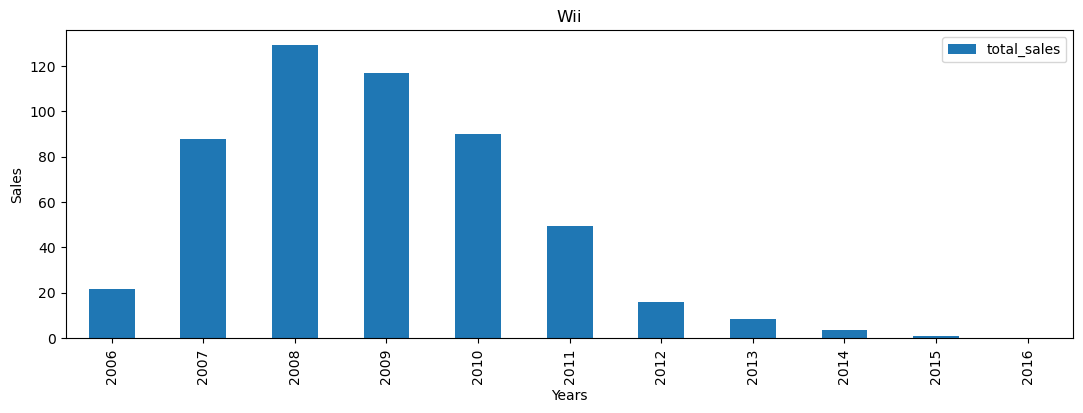

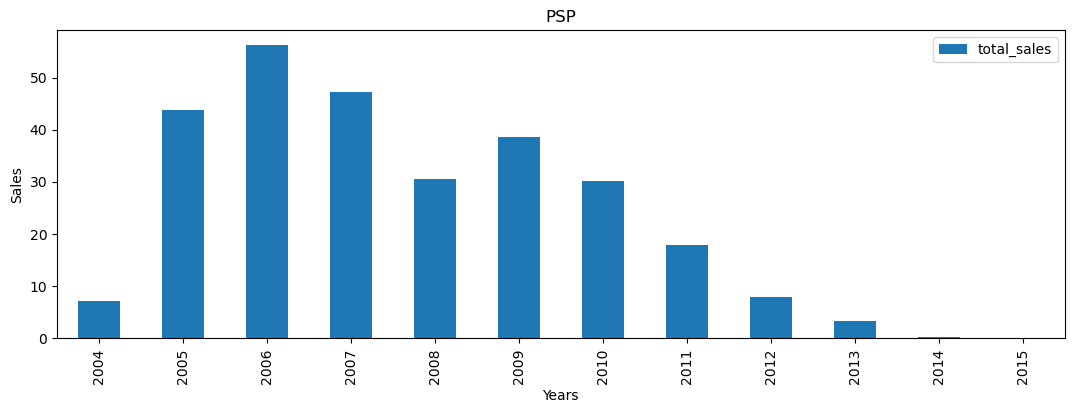

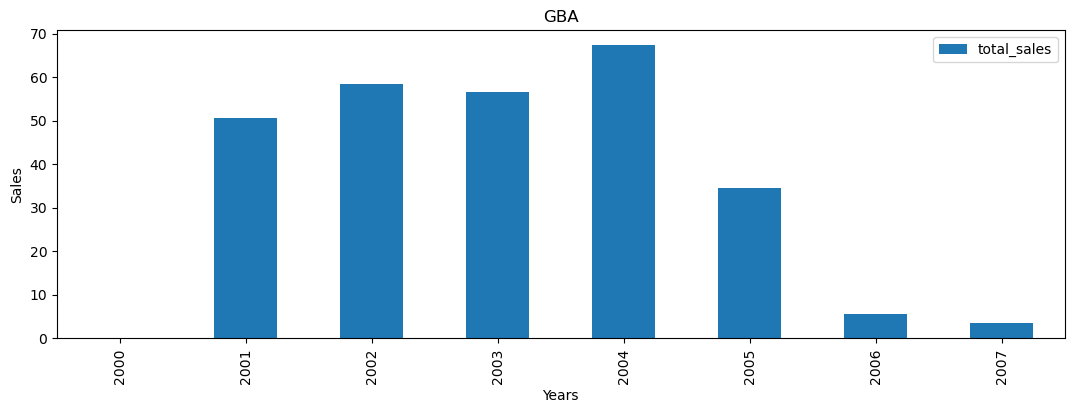

In [25]:
top_platforms  = list(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)[0:8].keys())
for i in top_platforms:
    df[df['platform'] == i].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
    kind='bar', figsize=(13,4))
    plt.title(i)
    plt.xlabel("Years")
    plt.ylabel("Sales")

It can be seen from the graphs that the life of the platform is 10 years, a new platform appears in the middle, so we take 5 years from 2011
2016 excluded due to incomplete data

In [26]:
df_new=df[(df['year_of_release']>2012)&(df['year_of_release']<2017)]
top_platforms  = list(df_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False)[0:8].keys())

Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out? Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms.

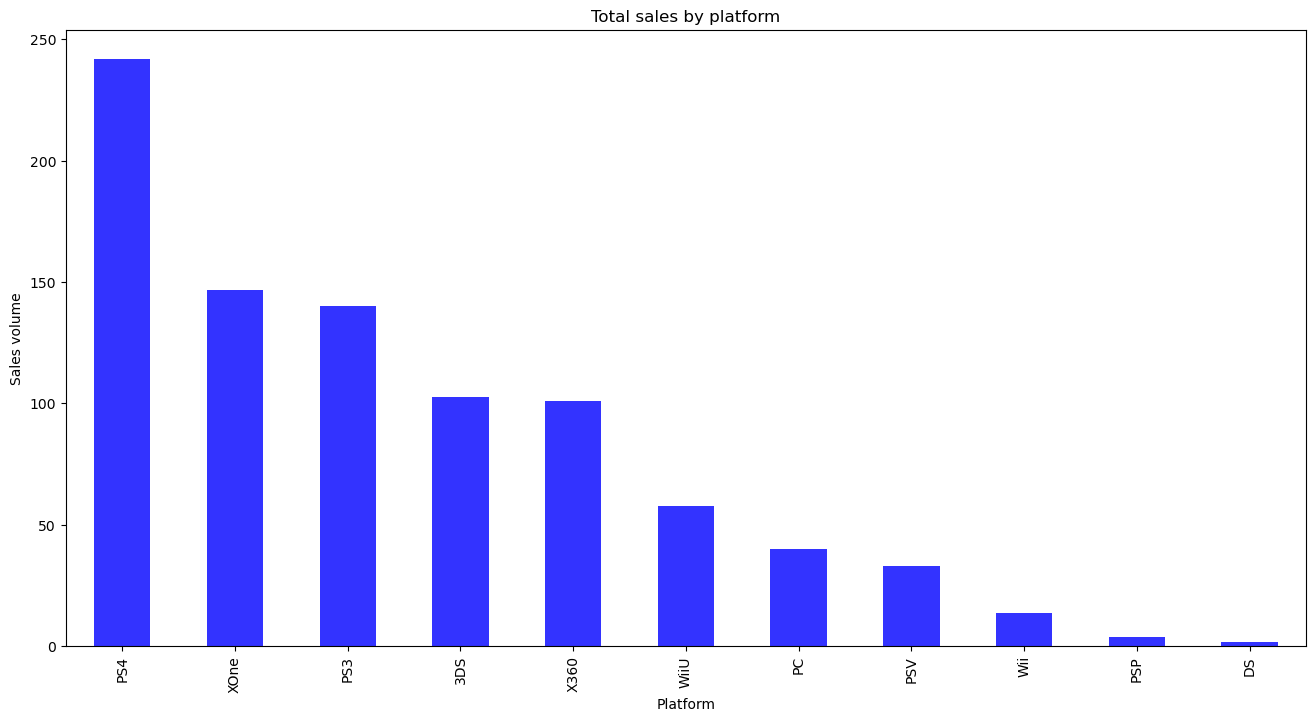

Top 6 platforms: ['PS4', 'XOne', 'PS3', '3DS', 'X360', 'WiiU']


In [27]:
(
    df_new
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending = False)
    .plot(y='total_sales', kind='bar', figsize=(16, 8), title='Total sales by platform', grid=False, color='blue', alpha=0.8, legend=False)
    .set(xlabel='Platform', ylabel='Sales volume')
)
plt.show()

top_6_platforms = (
    df_new
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending = False)
    .head(6).index.tolist()
)
print('Top 6 platforms:',top_6_platforms)

Let's leave in the analysis only the top

In [28]:
df_new = df_new.query('platform in @top_6_platforms')

Plot a box-and-mustache plot of each game's global sales and breakdown by platform. Is there a big difference in sales? What about average sales across platforms? Describe the result.

In [29]:
df_new.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,298.0,0.344631,0.777213,0.01,0.04,0.090,0.2600,7.14
PS3,341.0,0.411378,0.711537,0.01,0.04,0.140,0.4600,5.86
PS4,384.0,0.629740,1.017957,0.01,0.06,0.195,0.6925,5.64
WiiU,114.0,0.504737,0.841534,0.01,0.06,0.195,0.5875,4.87
X360,183.0,0.552514,0.751212,0.01,0.08,0.260,0.7750,4.28
XOne,245.0,0.598653,0.898044,0.01,0.06,0.220,0.6800,5.47


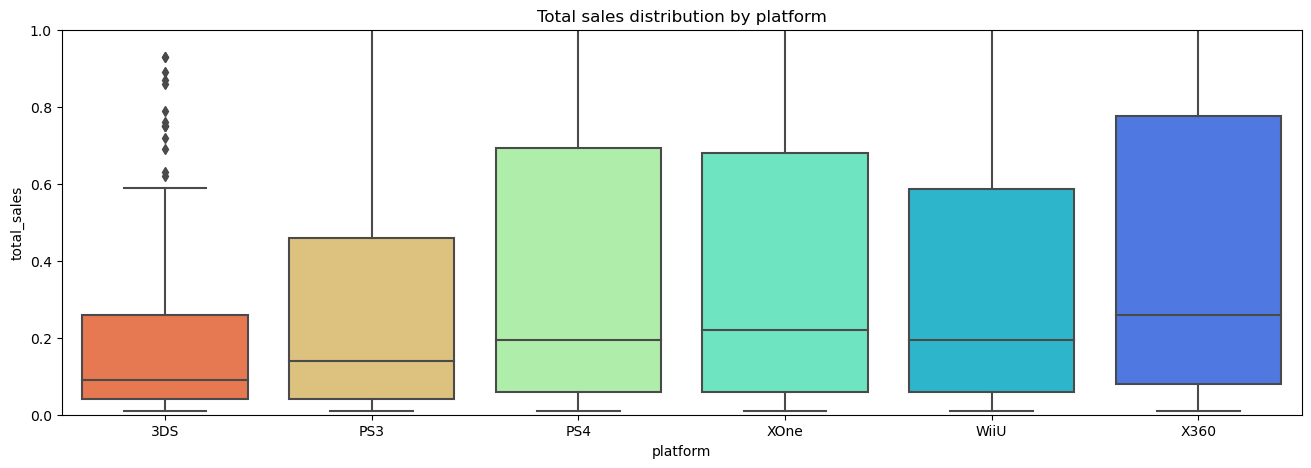

In [30]:
table = df_new.groupby('platform')['total_sales'].describe()
plt.rcParams['figure.figsize']=(16, 5)
ax = sns.boxplot(x="platform", y="total_sales", data=df_new, palette='rainbow_r')
ax.set_title('Total sales distribution by platform')
ax.set_ylim(0, 1)
plt.show()

We see that the median x360 and ps4 are the same - consoles of the same generation, but ps4 has a wider spread in sales. For PS3, the spread of sales is smaller, as is the median

Sales at xone and ps4 can be explained by the stage of maturity - they are in their prime when their predecessors are already completing their cycle, this also affects the sample size

See how sales within one popular platform are impacted by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales. Formulate conclusions and correlate them with sales of games on other platforms.

In [31]:
print(top_platforms)

['PS4', 'XOne', 'PS3', '3DS', 'X360', 'WiiU', 'PC', 'PSV']


In [32]:
#Let's write a function that will draw scatter plots and calculate correlations

def corr_func(name_of_platform):
    platform = df_new[df_new['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='User scor')
    ax[1].set(xlabel='Critic score')
    ax[0].set(ylabel='Total sales')
    ax[1].set(ylabel='Total sales')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    print('Correlation between critic reviews and gaming platform ', name_of_platform.upper(), round(critic_correl,1))
    print('Correlation between user reviews and sales ', name_of_platform.upper(), round(correl,1))

    print('\n')

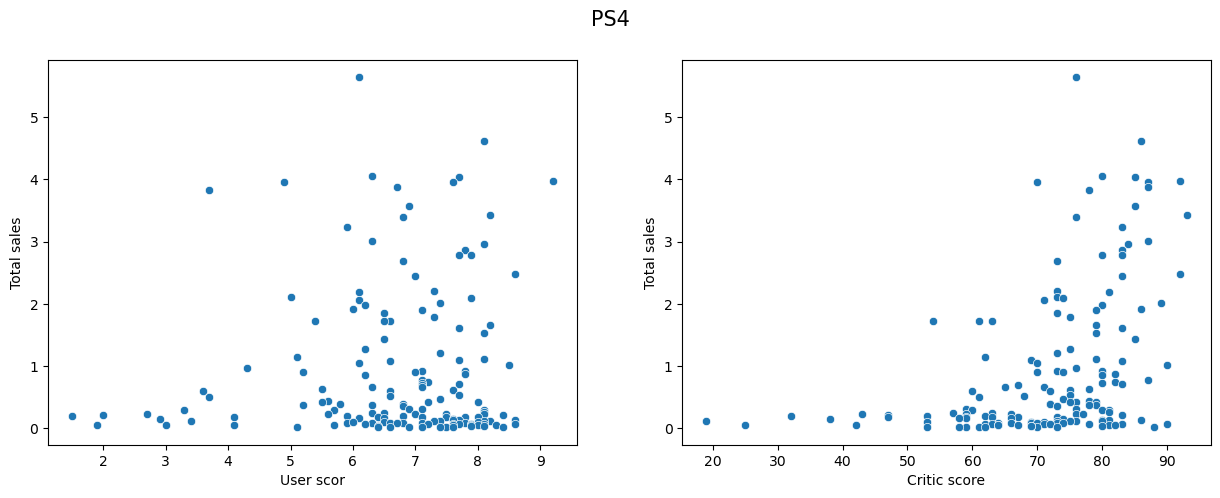

Correlation between critic reviews and gaming platform  PS4 0.4
Correlation between user reviews and sales  PS4 0.1




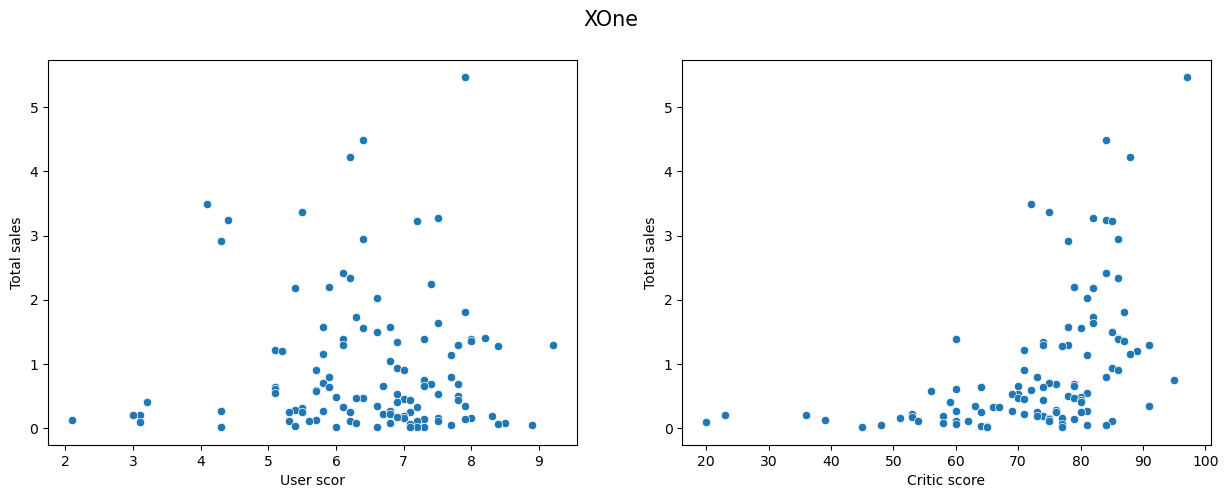

Correlation between critic reviews and gaming platform  XONE 0.5
Correlation between user reviews and sales  XONE -0.0




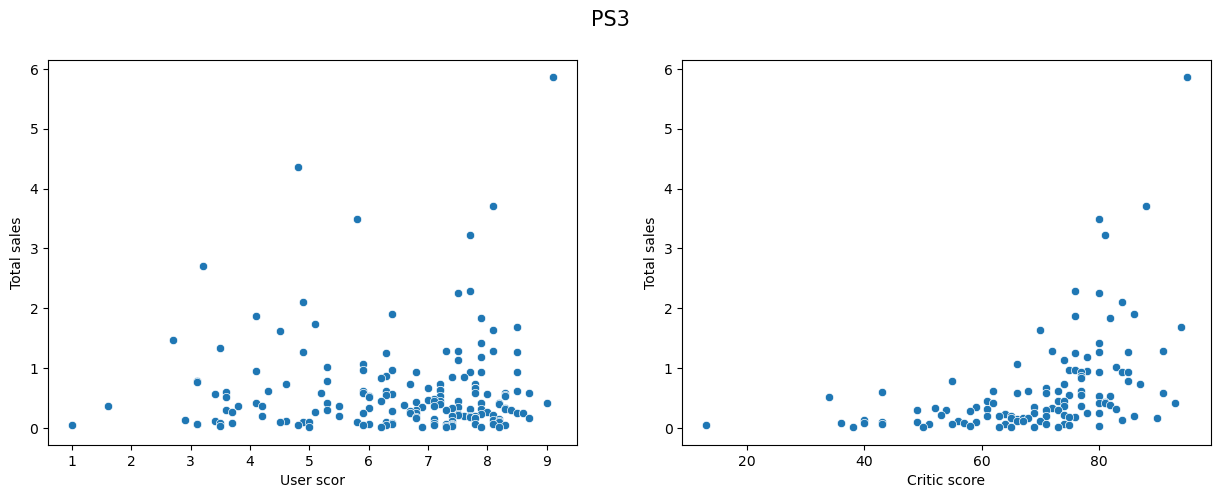

Correlation between critic reviews and gaming platform  PS3 0.5
Correlation between user reviews and sales  PS3 0.0




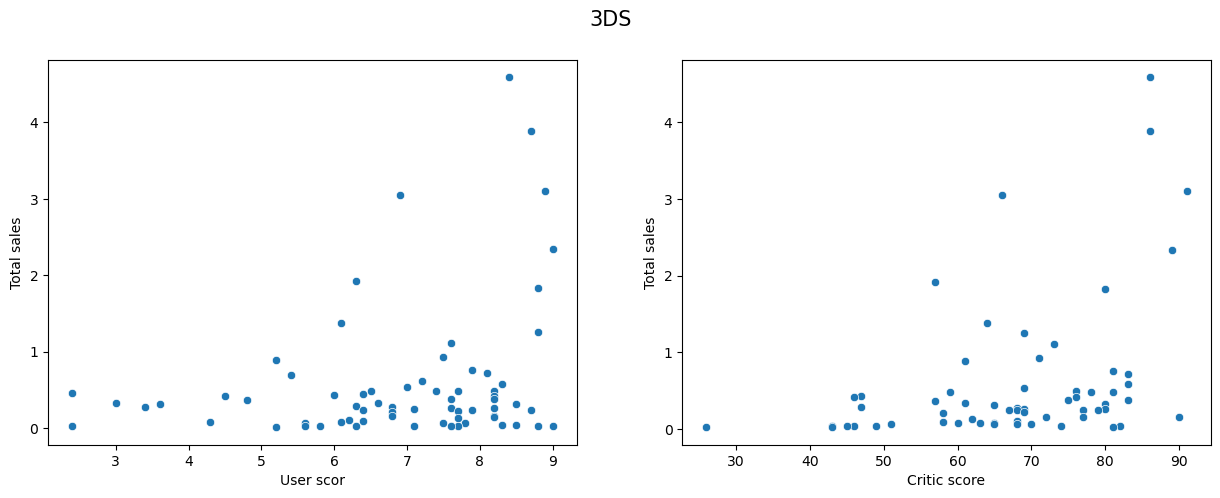

Correlation between critic reviews and gaming platform  3DS 0.4
Correlation between user reviews and sales  3DS 0.3




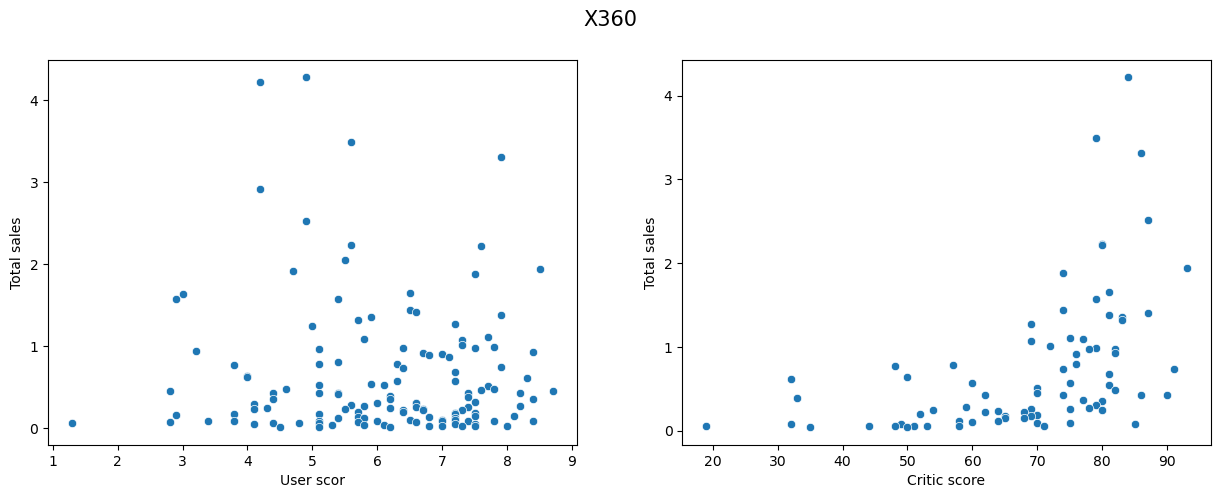

Correlation between critic reviews and gaming platform  X360 0.5
Correlation between user reviews and sales  X360 -0.1




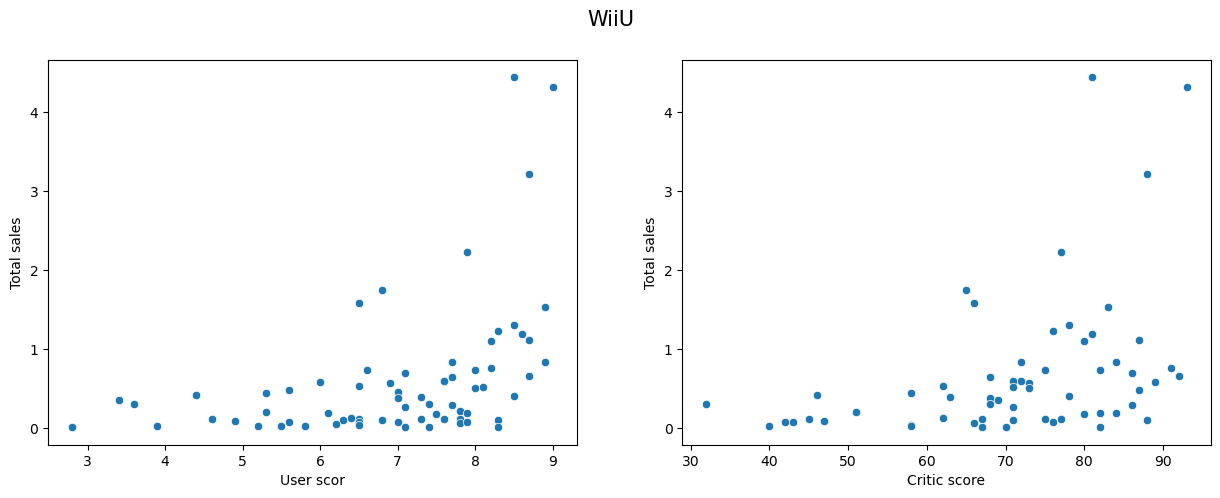

Correlation between critic reviews and gaming platform  WIIU 0.4
Correlation between user reviews and sales  WIIU 0.4




In [47]:
#Using a loop, display all 6 charts
for platform in top_6_platforms:
    corr_func(platform)

We see a low correlation between ratings and sales. At the same time, reviews from critics are trusted more (higher correlation) than users, with the exception of Asian platforms

Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

In [34]:
sales_d = df_new.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
display(sales_d)

,genre,total_sales
0,Action,250.77
1,Shooter,159.18
2,Sports,111.94
3,Role-Playing,89.59
4,Misc,41.77
5,Platform,39.15
6,Racing,31.73
7,Fighting,26.45
8,Adventure,18.76
9,Simulation,13.25


In [35]:
sales_d = df_new.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
display(sales_d)

,genre,total_sales
0,Shooter,0.505
1,Sports,0.360
2,Platform,0.255
3,Racing,0.180
4,Role-Playing,0.175
5,Fighting,0.150
6,Action,0.140
7,Misc,0.130
8,Simulation,0.110
9,Strategy,0.080


The most profitable genres are Action, Shooter, Sport. The least successful Strategy and Puzzle. Buyers are attracted by fast games.
Marginality cannot be inferred because there is no data on production costs. Platform have a high median, which indicates a greater dispersion of the Action genre and the prospects of the Platform genre

# Step 4. Create a user profile for each region
Define for the user of each region (NA, EU, JP):
The most popular platforms (top 5). Describe the differences in sales shares.
The most popular genres (top 5). Explain the difference.
Does the ESRB rating affect sales in a particular region?

NA

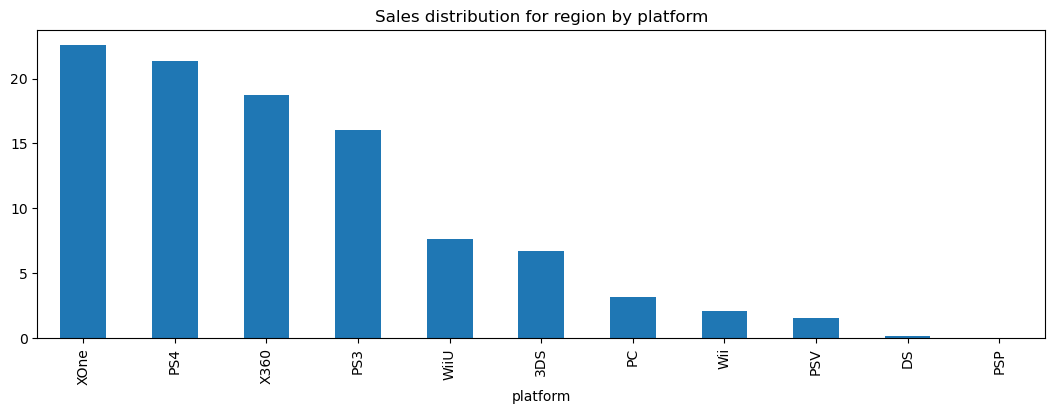

Top 5: ['XOne', 'PS4', 'X360', 'PS3', 'WiiU']


In [52]:
df2=df_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
a = df2*100/df2.sum()
a.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by platform")
plt.show()

print('Top 5:',a.head(5).index.tolist())

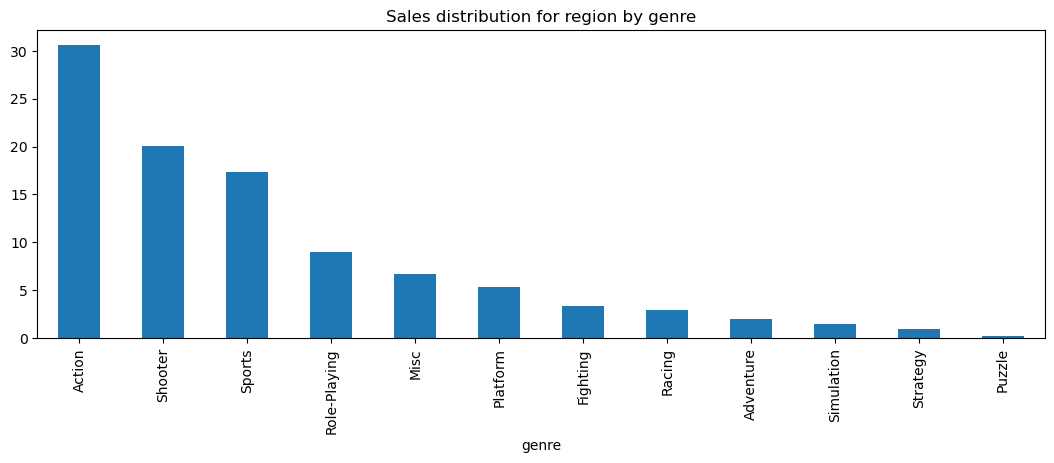

Top 5: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


In [55]:
df2=df_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
a=df2*100/df2.sum()
a.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by genre")
plt.show()
print('Top 5:',a.head(5).index.tolist())

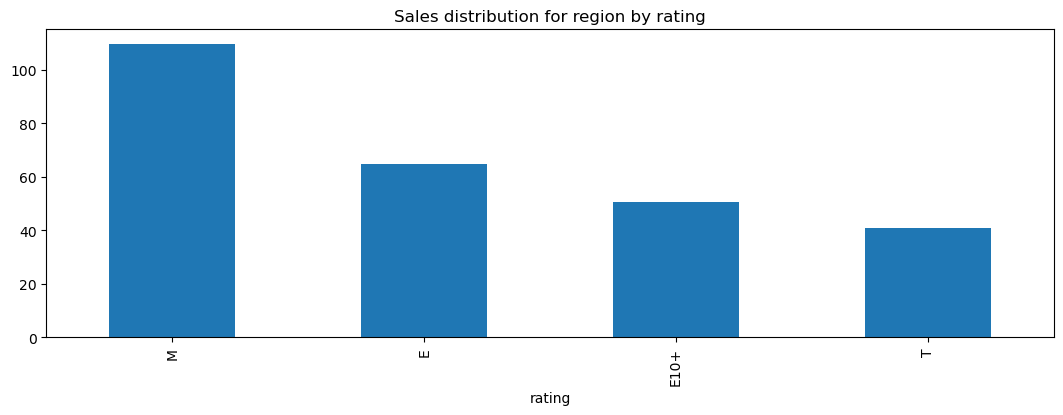

Top 5: ['M', 'E', 'E10+', 'T']


In [56]:
b=df_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
b.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by rating")
plt.show()
print('Top 5:',b.head(5).index.tolist())

EU

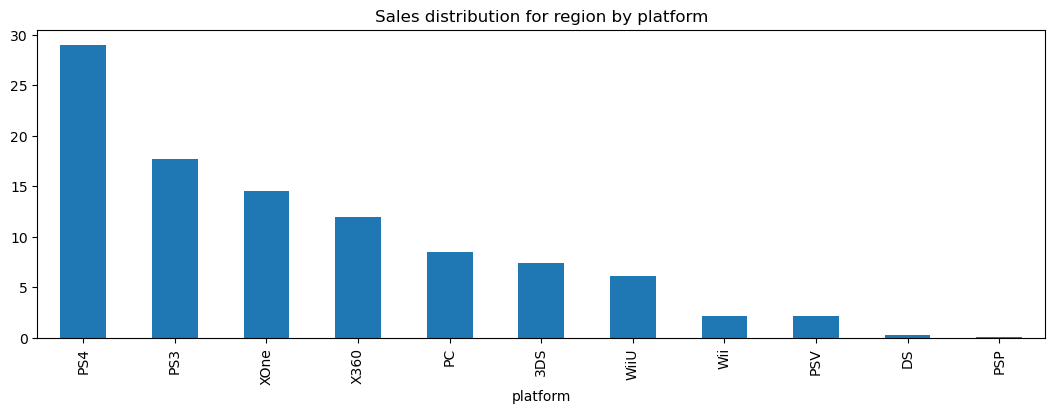

Top 5: ['PS4', 'PS3', 'XOne', 'X360', 'PC']


In [57]:
df2=df_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
a=df2*100/df2.sum()
a.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by platform")
plt.show()
print('Top 5:',a.head(5).index.tolist())

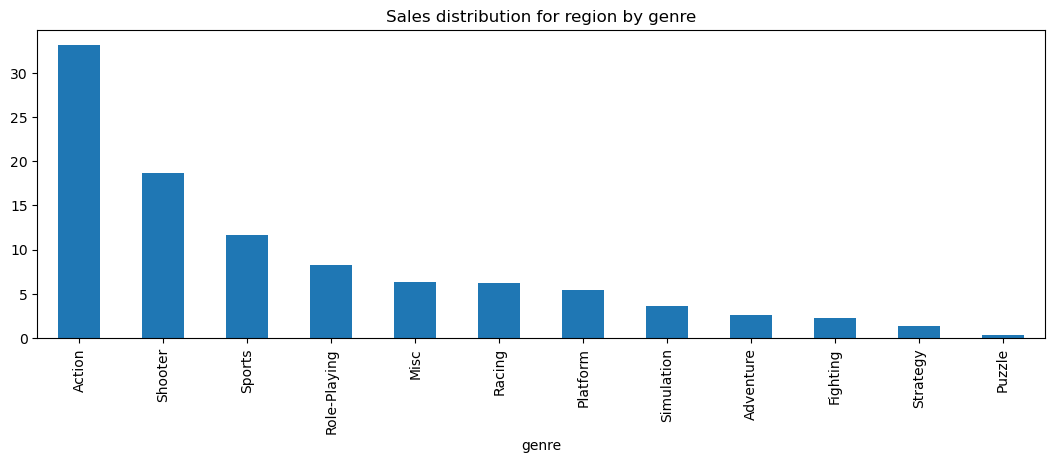

Top 5: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


In [58]:
df2=df_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
a=df2*100/df2.sum()
a.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by genre")
plt.show()
print('Top 5:',a.head(5).index.tolist())

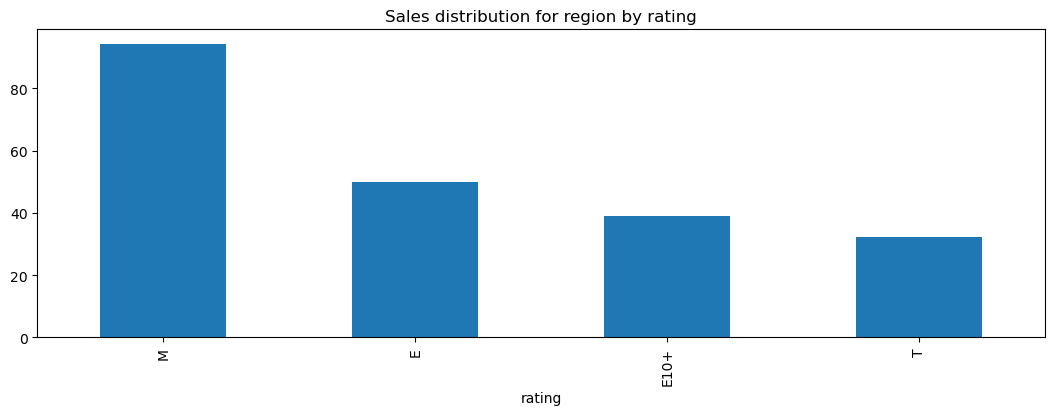

Top 5: ['M', 'E', 'E10+', 'T']


In [59]:
a=df_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
a.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by rating")
plt.show()
print('Top 5:',a.head(5).index.tolist())

JP

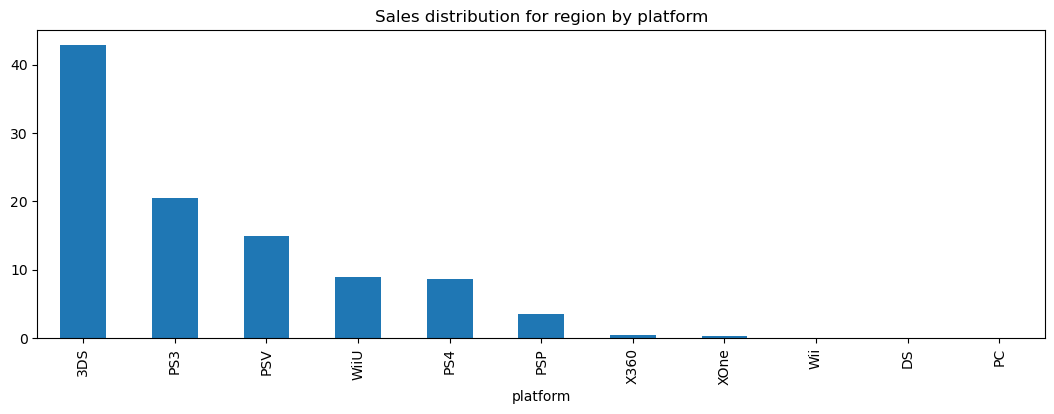

Top 5: ['3DS', 'PS3', 'PSV', 'WiiU', 'PS4']


In [60]:
df2=df_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
a=df2*100/df2.sum()
a.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by platform")
plt.show()
print('Top 5:',a.head(5).index.tolist())

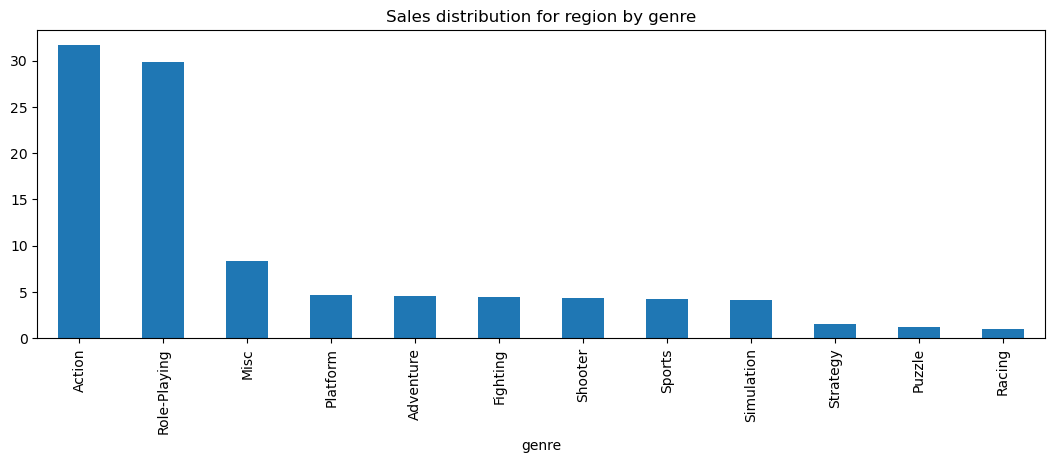

Top 5: ['Action', 'Role-Playing', 'Misc', 'Platform', 'Adventure']


In [61]:
df2=df_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
a=df2*100/df2.sum()
a.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by genre")
plt.show()
print('Top 5:',a.head(5).index.tolist())

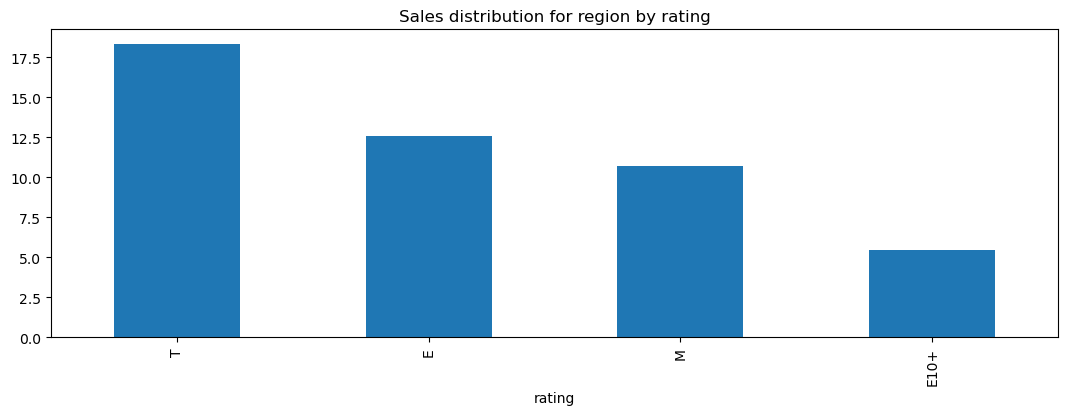

Top 5: ['T', 'E', 'M']


In [62]:
a=df_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
a.plot(kind='bar', figsize=(13,4), title="Sales distribution for region by rating")
plt.show()
print('Top 5:',a.head(3).index.tolist())

In general, Europe and America are similar, Asia is different, it is easy to explain the differences in culture.
In all regions, E and M collect large sales, the leader in Asia is different. At the same time, games without a rating collect the lion's share. This can be explained by the lack of coverage, especially for the Asian region. An additional factor could be a long tail (not rated) or an unwillingness to rate the game.
Asia prefers its own consoles and excels in genre passions

# Step 5. Test the hypotheses
The average user ratings of the Xbox One and PC platforms are the same;
The average user ratings for Action and Sports genres are different.
Set the alpha threshold yourself.
Explain:
How did you formulate the null and alternative hypotheses;
What criterion was used to test the hypotheses and why.

Null hypothesis - population means are equal
Alternative - population means are not equal
We use the student's t test, since we have a sample, not a general population

In [45]:
df_new=df[(df['year_of_release']>2012)&(df['year_of_release']<2016)]
alpha= 0.05
sample_1=df_new[df_new['platform']=='XOne']['user_score'].dropna()
sample_2=df_new[df_new['platform']=='PC']['user_score'].dropna()
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value:  0.29458747773379296
Failed to reject the null hypothesis


We can say with a high 95% certainty that the average user ratings of the Xbox One and PC platforms are the same

In [46]:
alpha= 0.05
sample_1=df_new[df_new['genre']=='Action']['user_score'].dropna()
sample_2=df_new[df_new['genre']=='Sports']['user_score'].dropna()
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value:  7.294419003568451e-18
Rejecting the null hypothesis


It can be said with a high 95% certainty that the average user ratings of the Action and Sports genres are NOT the same

Hypothesis: "The average user ratings of the Xbox one and PC platforms are the same." The null hypothesis could not be disproven.
Hypothesis: "Average user ratings for the Action and Sports genres are the same." We reject the null hypothesis.

# STEP 6. General conclusion
data omitted